# IMSE DigiFAB Datathon April 2022

In [3]:
import numpy as np
import pandas as pd
from sklearn import *
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load data
train_set = pd.read_csv('../data/Train.csv')
features = train_set.drop(columns=['ID', 'Energy', 'Facet', 'Chemical_Composition', 'Equation', 'Coordinates_Available'])
X = features

In [4]:
Y = train_set.Energy
Y.head()

0   -0.515000
1   -0.844829
2   -0.670000
3   -1.203314
4   -1.527000
Name: Energy, dtype: float64

In [5]:
# Splitting data into training and test sets
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [6]:
# Building and fitting the model
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [7]:
# Making predictions with the model trained on both the training and test sets
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

In [8]:
# Checking the performance of the model based on the test set
print('Mean squared error (MSE): %.3f' % mean_squared_error(Y_test, Y_pred_test))
print('Coefficient of determination (R^2): %.3f' % r2_score(Y_test, Y_pred_test))

Mean squared error (MSE): 0.234
Coefficient of determination (R^2): 0.684


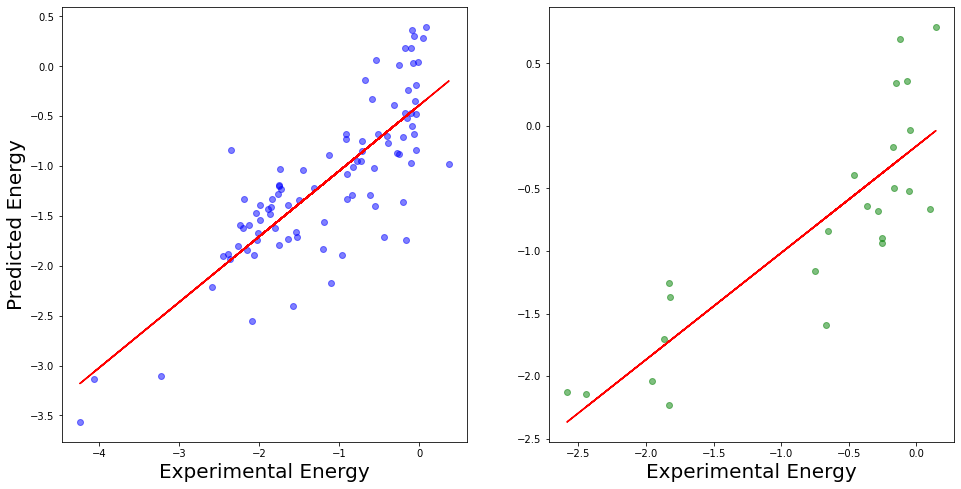

In [9]:
# Plotting nice figures to visualise model performance
plt.figure(figsize = (16,8))

plt.subplot(1, 2, 1)
plt.scatter(x = Y_train, y = Y_pred_train, c = 'blue', alpha = 0.5)

fit_1 = np.polyfit(Y_train, Y_pred_train, 1)
coeff_1 = np.poly1d(fit_1)
plt.plot(Y_train, coeff_1(Y_train), c = 'red')

plt.ylabel('Predicted Energy', fontdict = {'size': 20})
plt.xlabel('Experimental Energy', fontdict = {'size': 20})

plt.subplot(1, 2, 2)
plt.scatter(x = Y_test, y = Y_pred_test, c = 'green', alpha = 0.5)

fit_2 = np.polyfit(Y_test, Y_pred_test, 1)
coeff_2 = np.poly1d(fit_2)
plt.plot(Y_test, coeff_2(Y_test), c = 'red')

plt.xlabel('Experimental Energy', fontdict = {'size': 20})

plt.rc('xtick', labelsize = 15)
plt.rc('ytick', labelsize = 15)

plt.show()

# Choosing the right estimator (model)
Often the hardest part of solving a machine learning problem can be finding the right estimator for the job.
Different estimators are better suited for different types of data and different problems.
The flowchart below is designed to give users a bit of a rough guide on how to approach problems with regard to which estimators to try on your data. Source (interactive!): https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html


<img src="https://scikit-learn.org/stable/_static/ml_map.png" alt="scikit learn cheat sheet" width="90%"/>

### Writing predictions to file

In [22]:
# Loads molecules from the test set 
test = pd.read_csv('../data/Test_Input.csv')
test_features = test.drop(columns=['ID', 'Facet', 'Chemical_Composition', 'Equation', 'Coordinates_Available'])

In [26]:
# Make predictions
Y_pred = model.predict(test_features)
# Save predictions to a .csv file
pd.Series(Y_pred).to_csv('task_1_predictions.csv', index=False, header=False)